<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [192]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

#lendo o arquivo xml com with open

with open('estados-bruto.xml', 'r', encoding='utf-8') as arquivo:
  dados_xml = arquivo.read()

#criando o objeto BestifulSoup do xml
estados_xml = BeautifulSoup(dados_xml, 'lxml')

#print(estados_xml)

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [193]:
# visualize os resultados

print(estados_xml.prettify())

<?xml version="1.0" encoding="utf-8" ?>
<html>
 <body>
  <estados>
   <estado>
    <id>
     1
    </id>
    <nome>
     ACRE
    </nome>
    <idcapital>
     16
    </idcapital>
    <sigla>
     AC
    </sigla>
    <regiao>
     NORTE
    </regiao>
   </estado>
   <estado>
    <id>
     2
    </id>
    <nome>
     ALAGOAS
    </nome>
    <idcapital>
     68
    </idcapital>
    <sigla>
     AL
    </sigla>
    <regiao>
     NORDESTE
    </regiao>
   </estado>
   <estado>
    <id>
     3
    </id>
    <nome>
     AMAPA
    </nome>
    <idcapital>
     131
    </idcapital>
    <sigla>
     AP
    </sigla>
    <regiao>
     NORTE
    </regiao>
   </estado>
   <estado>
    <id>
     4
    </id>
    <nome>
     AMAZONAS
    </nome>
    <idcapital>
     178
    </idcapital>
    <sigla>
     AM
    </sigla>
    <regiao>
     NORTE
    </regiao>
   </estado>
   <estado>
    <id>
     5
    </id>
    <nome>
     BAHIA
    </nome>
    <idcapital>
     536
    </idcapital>
    <sigla>
     BA
  

In [194]:

import csv

#Criando o objeto BeautifulSoup
estados_xml = BeautifulSoup(dados_xml, 'xml')

# Extraia as informações necessárias (nome, sigla, região) do XML
dados_estados = []
for estado in estados_xml.find_all('ESTADO'):
    nome = estado.find('NOME').text.strip()
    sigla = estado.find('SIGLA').text.strip()
    regiao = estado.find('REGIAO').text.strip()
    dados_estados.append([nome, sigla, regiao])

# Salvando os dados extraídos em um arquivo csv


In [195]:
# escrevendo o conteudo extraido no arquivo estados-limpo.csv e separando por ;

caminho_arquivo_csv = 'estados-limpo.csv'
with open(caminho_arquivo_csv, 'w', newline='') as arquivo_csv:
    escrevendo_csv = csv.writer(arquivo_csv, delimiter=';')
    escrevendo_csv.writerow(['estado', 'sigla', 'regiao'])  # Escrevendo o cabeçalho
    escrevendo_csv.writerows(dados_estados)



### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [196]:
import pandas as pd
# lendo o arquivo cidades-bruto.csv e criando um data frame no pandas

df_censo = pd.read_csv('cidades-bruto.csv', sep=',')

In [197]:
# visualizando o data frame
display(df_censo)


,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [198]:
#Filtrando o data frame apenas para o Censo de 2010

df_censo_filtrado = df_censo[df_censo['Censo'] == 2010.0]

#tratando a colu 'PIB', para deixá-la em formato de número decimal

df_censo_filtrado['PIB'] = df_censo_filtrado['PIB'].apply(lambda x: '{:.7f}'.format(x))

#tratando a coluna Censo para deixá-la com formato de ano "2010"

df_censo_filtrado['Censo'] = df_censo_filtrado['Censo'].apply(lambda x: '{:.0f}'.format(x))

#Criando novo Data frame somente com os dados a serem extraídos

colunas_df = df_censo_filtrado[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

#tratando os caracteres especiais pelo unidecode das colunas 'UF' e 'nome'

!pip install unidecode
from unidecode import unidecode

colunas_df['UF'] = colunas_df['UF'].apply(unidecode)
colunas_df['nome'] = colunas_df['nome'].apply(unidecode)


#renomeando as colunas para ficarem no formato solicitado no cabeçalho

novos_nomes = ['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']
colunas_df.columns = novos_nomes

#display(colunas_df)

colunas_df.to_csv('cidades-limpo.csv',sep=';',index=False)

<ipython-input-198-b5fa653f3ac6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo_filtrado['PIB'] = df_censo_filtrado['PIB'].apply(lambda x: '{:.7f}'.format(x))
<ipython-input-198-b5fa653f3ac6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo_filtrado['Censo'] = df_censo_filtrado['Censo'].apply(lambda x: '{:.0f}'.format(x))


<ipython-input-198-b5fa653f3ac6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_df['UF'] = colunas_df['UF'].apply(unidecode)
<ipython-input-198-b5fa653f3ac6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colunas_df['nome'] = colunas_df['nome'].apply(unidecode)


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [199]:
# solução do exercício 1.3

#lendo os data frames criados

estados = pd.read_csv('estados-limpo.csv', sep=';', encoding='utf8')
cidades = pd.read_csv('cidades-limpo.csv', sep=';', encoding='utf8')

#criando o novo data frame utilizando o método 'merge'

brasil_df = pd.merge(cidades, estados, on='estado')

#criando o arquivo brasil.csv

brasil_df.to_csv('brasil.csv', sep=';', index=False, encoding='utf8')

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [200]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv', sep=';')
display(brasil_df)

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapua,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibitita,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5553,AMAPA,Macapa,366484,4.679694e+06,12769.160156,AP,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

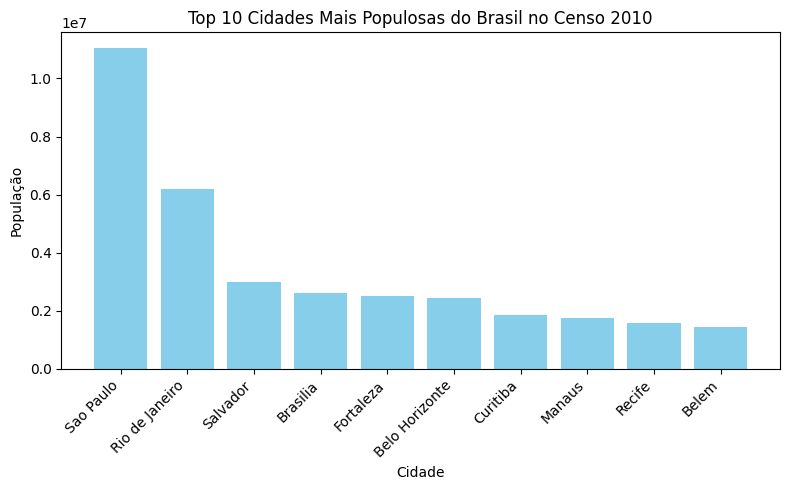

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
3271,SAO PAULO,Sao Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
4504,RIO DE JANEIRO,Rio de Janeiro,6186710,175739344.0,28405.949219,RJ,SUDESTE
44,BAHIA,Salvador,2998056,32824228.0,10948.500000,BA,NORDESTE
5554,DISTRITO FEDERAL,Brasilia,2606885,131487264.0,50438.460938,DF,CENTRO-OESTE
4221,CEARA,Fortaleza,2505552,31789186.0,12687.500000,CE,NORDESTE
1735,MINAS GERAIS,Belo Horizonte,2452617,44595204.0,18182.699219,MG,SUDESTE
4849,PARANA,Curitiba,1851215,45762420.0,24720.210938,PR,SUL
3720,AMAZONAS,Manaus,1738641,40486108.0,23286.060547,AM,NORTE
2435,PERNAMBUCO,Recife,1561659,24835340.0,15903.179688,PE,NORDESTE
2624,PARA,Belem,1437600,16526989.0,11496.240234,PA,NORTE


In [201]:
import matplotlib.pyplot as plt

#informando as 10 cidades mais populosas desse estudo


cidades_mais_populosas = brasil_df.nlargest(10, 'populacao')

# Criando um gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(cidades_mais_populosas['cidade'], cidades_mais_populosas['populacao'], color='skyblue')
plt.title('Top 10 Cidades Mais Populosas do Brasil no Censo 2010')
plt.xlabel('Cidade')
plt.ylabel('População')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()
display(cidades_mais_populosas)

 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

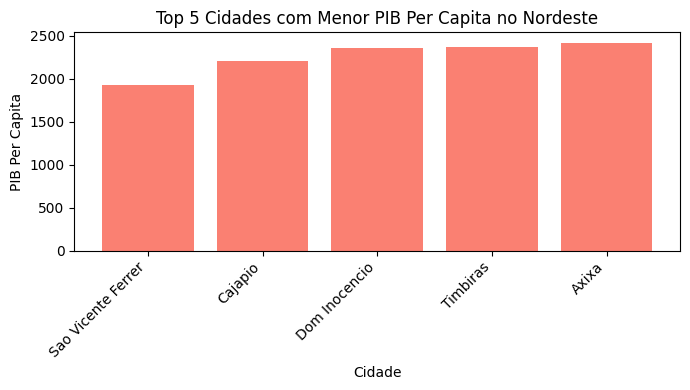

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
4464,MARANHAO,Sao Vicente Ferrer,20463,39492.960938,1929.969971,MA,NORDESTE
4359,MARANHAO,Cajapio,10337,22781.035156,2203.830078,MA,NORDESTE
1848,PIAUI,Dom Inocencio,10795,25457.230469,2358.239990,PI,NORDESTE
4483,MARANHAO,Timbiras,26909,63724.851562,2368.159912,MA,NORDESTE
4380,MARANHAO,Axixa,15203,36745.226562,2416.969971,MA,NORDESTE


In [202]:
# código para responder a pergunta

cidades_nordeste = brasil_df[brasil_df['regiao'] == 'NORDESTE']
cidades_menor_pib_percapita = cidades_nordeste.nsmallest(5, 'pib_percapita')

# Criando um gráfico de barras
plt.figure(figsize=(7, 4))
plt.bar(cidades_menor_pib_percapita['cidade'], cidades_menor_pib_percapita['pib_percapita'], color='salmon')
plt.title('Top 5 Cidades com Menor PIB Per Capita no Nordeste')
plt.xlabel('Cidade')
plt.ylabel('PIB Per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()
display(cidades_menor_pib_percapita)

 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

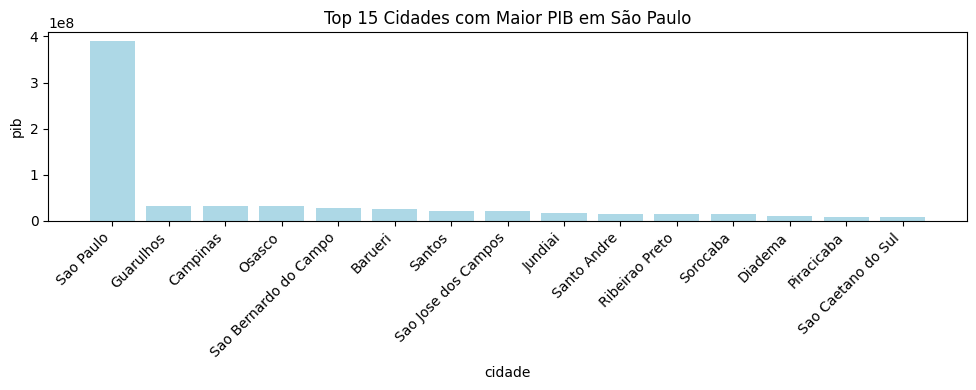

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
3271,SAO PAULO,Sao Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
3223,SAO PAULO,Guarulhos,1299283,32473828.0,24993.650391,SP,SUDESTE
3340,SAO PAULO,Campinas,1064669,31654720.0,29731.980469,SP,SUDESTE
3106,SAO PAULO,Osasco,718646,31616452.0,43994.468750,SP,SUDESTE
2810,SAO PAULO,Sao Bernardo do Campo,810979,28935768.0,35680.050781,SP,SUDESTE
3344,SAO PAULO,Barueri,270173,26908070.0,99595.703125,SP,SUDESTE
2768,SAO PAULO,Santos,417098,22546134.0,54054.761719,SP,SUDESTE
2994,SAO PAULO,Sao Jose dos Campos,615871,22018042.0,35751.058594,SP,SUDESTE
3014,SAO PAULO,Jundiai,349929,16585137.0,47395.718750,SP,SUDESTE
2816,SAO PAULO,Santo Andre,673396,14709603.0,21843.910156,SP,SUDESTE


In [203]:
cidades_sp = brasil_df[brasil_df['estado'] == 'SAO PAULO']
cidades_maior_pib_sp = cidades_sp.nlargest(15, 'pib')

# Criando um gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(cidades_maior_pib_sp['cidade'], cidades_maior_pib_sp['pib'], color='lightblue')
plt.title('Top 15 Cidades com Maior PIB em São Paulo')
plt.xlabel('cidade')
plt.ylabel('pib')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibindo o gráfico
plt.show()
display(cidades_maior_pib_sp)

 - Qual é o PIB do estado de Santa Catarina?

In [204]:
# código para responder a pergunta

pib_santa_catarina = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['pib'].sum()

# Exibindo o PIB do estado de Santa Catarina
print(f"PIB do estado de Santa Catarina: {pib_santa_catarina}")

PIB do estado de Santa Catarina: 129806256.75195369


 - Qual é o população da região sul?

In [205]:
# código para responder a pergunta

populacao_regiao_sul = brasil_df[brasil_df['regiao'] == 'SUL']['populacao'].sum()

# Exibindo a população total da região sul
print(f"População total da região sul: {populacao_regiao_sul}")

População total da região sul: 27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [206]:
pib_per_capita_ms = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['pib_percapita'].mean()

# Formatando o PIB per capita médio do Mato Grosso do Sul
pib_per_capita_formatado = '{:,.2f}'.format(pib_per_capita_ms)

# Exibindo o PIB per capita médio do Mato Grosso do Sul
print(f"PIB per capita médio do Mato Grosso do Sul: R$ {pib_per_capita_formatado}")

PIB per capita médio do Mato Grosso do Sul: R$ 14,458.90


 - Qual é a população do Brasil?

In [207]:
# código para responder a pergunta

populacao_brasil = brasil_df['populacao'].sum()

# Formatando a população do Brasil
populacao_formatada = '{:,}'.format(populacao_brasil)

# Exibindo a população do Brasil
print(f"População total do Brasil: {populacao_formatada}")

População total do Brasil: 191,176,146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

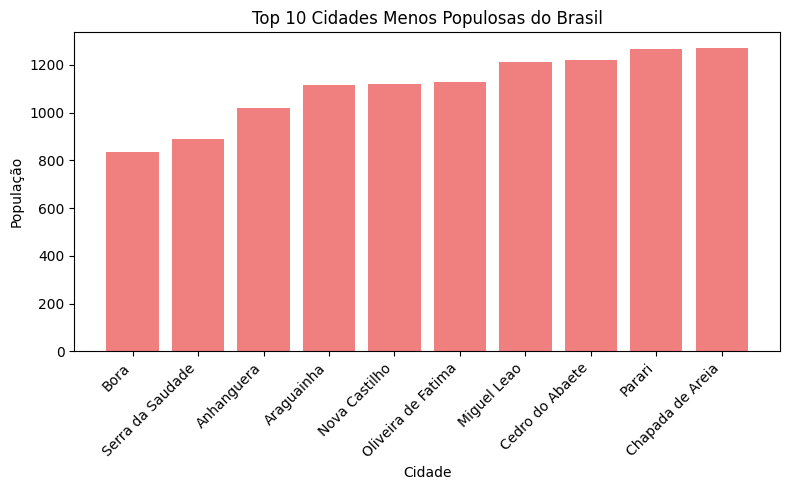

In [208]:
# código para gerar a visualização

cidades_menos_populosas = brasil_df.nsmallest(10, 'populacao')

# Criando um gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(cidades_menos_populosas['cidade'], cidades_menos_populosas['populacao'], color='lightcoral')
plt.title('Top 10 Cidades Menos Populosas do Brasil')
plt.xlabel('Cidade')
plt.ylabel('População')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibindo o gráfico
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

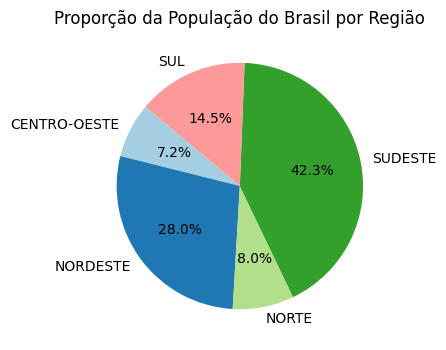

In [209]:
# código para gerar a visualização

populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()

# Criando um gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporção da População do Brasil por Região')

# Exibindo o gráfico
plt.show()